In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784", version = 1, as_frame =False)
X,y = mnist["data"], mnist["target"]
y = y.astype(np.int64)

In [3]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time


In [5]:
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
start_time = time.time()
rf_clf.fit(X_train, y_train)
rf_train_time = time.time() - start_time

In [6]:
y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_train_time, rf_accuracy

(4.413843631744385, 0.9705)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train.shape, X_train_pca.shape

((60000, 784), (60000, 154))

In [8]:
rf_pca_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
start_time = time.time()
rf_pca_clf.fit(X_train_pca, y_train)
rf_pca_train_time = time.time() - start_time

In [9]:
y_pred_pca = rf_pca_clf.predict(X_test_pca)
rf_pca_accuracy = accuracy_score(y_test, y_pred_pca)
rf_pca_train_time, rf_pca_accuracy

(12.980340719223022, 0.9488)

In [10]:
np.random.seed(42)
indices = np.random.choice(len(X_train), 2000, replace = False)

X_subset = X_train[indices]
y_subset  =y_train[indices]

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = "auto", random_state = 42)

In [14]:
X_tsne = tsne.fit_transform(X_subset)

In [16]:
import matplotlib.pyplot as plt

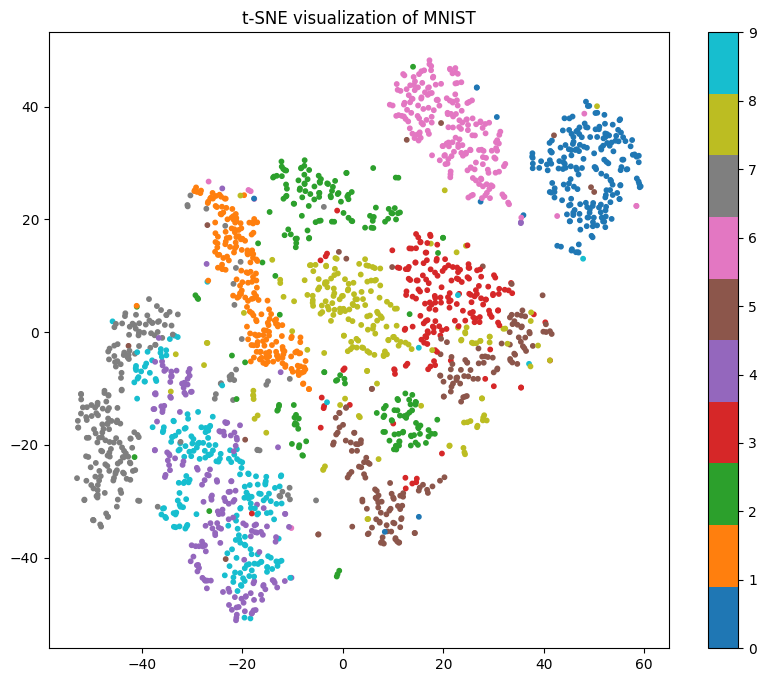

In [21]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_tsne[:,0],
                     X_tsne[:,1],
                     c = y_subset,
                     cmap="tab10",
                     s=10
)
plt.colorbar(scatter)
plt.title("t-SNE visualization of MNIST")
plt.show()